In [ ]:
## I imported the necessary libraries and the dataset needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly

data = pd.read_csv('/content/train(2) (1).csv')
df = data.copy()
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
## I checked for the information of the dataset to see if there are null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [ ]:
## I checked the description of the dataset
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
## I seperated the categorical data from the numerical data
categorical = df.select_dtypes(include = ['object', 'category'])
numerical = df.select_dtypes(include = 'number')
print(f'Categorical df')
display(categorical.head(4))
print(f'\n\nNumerical df')
display(numerical.head(2))

Categorical df


,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,United-States
1,Private,12th,Never-married,Other-service,Own-child,White,Male,United-States
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
3,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States




Numerical df


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,366425,16,99999,0,60,1
1,17,244602,8,0,0,15,0


In [ ]:
## --I checked for the average age of each Education Level
sel = df[['education', 'age']]
data = sel.groupby(['education']) [['age']].mean().sort_values(by = 'age', ascending = True)
data.head(3)

,age
education,
11th,31.803886
12th,32.207836
Some-college,35.678039


In [ ]:
##--I checked for the education level that has the most capital gain
sel = df[['education', 'capital-gain']]
data = sel.groupby(['education']) [['capital-gain']].mean().sort_values(by = 'capital-gain', ascending = False)
data.head(3)

,capital-gain
education,
Prof-school,11101.312834
Doctorate,5905.848881
Masters,2603.541388


In [ ]:
#--I checked for the race with the most capital loss
sel = df[['race', 'capital-gain']]
data = sel.groupby(['race']) [['capital-gain']].mean().sort_values(by = 'capital-gain', ascending = False)
data.head(3)

,capital-gain
race,
Asian-Pac-Islander,1555.806992
White,1136.137469
Other,1067.126005


In [ ]:
##-- I checked the total capital loss for all Female that is Divorced
sel = df[['marital-status', 'gender', 'capital-loss']]
sel = sel.loc[(df['gender'] == 'Female') & (df['marital-status'] == 'Divorced')]
data = sel.groupby(['marital-status', 'gender']) [['capital-loss']].mean().sort_values(by = 'capital-loss')
data

,,capital-loss
marital-status,gender,
Divorced,Female,55.487791


In [ ]:
#--I checked for the Marital Status that would be considered when given a loan
sel = df[['marital-status', 'income_>50K']]
data = sel.groupby(['marital-status']) [['income_>50K']].mean().sort_values(by = 'income_>50K', ascending = False)
data.head(1)

,income_>50K
marital-status,
Married-civ-spouse,0.445972


In [ ]:
##-- I cheecked for the total capital gain of all Doctorate education level
sel = df[['education', 'capital-gain']]
sel = sel.loc[(df['education'] == 'Doctorate')]
data = sel.groupby(['education']) [['capital-gain']].mean().sort_values(by = 'capital-gain')
data

,capital-gain
education,
Doctorate,5905.848881


In [ ]:
#--I checked for the occupation that works the most total hours per week and the average capital gain of the class.
sel = df[['occupation', 'capital-gain', 'hours-per-week']]
data = sel.groupby(['occupation', 'capital-gain']) [['hours-per-week']].mean().sort_values(by = 'hours-per-week', ascending = False)
data.head(1)

,,hours-per-week
occupation,capital-gain,
Prof-specialty,2961,99.0


In [ ]:
#--I checked for the age that got divorced
sel = df[['marital-status', 'race']]
sel = sel.loc[(df['marital-status'] == 'Divorced')]
data = sel.groupby(['marital-status','race'])
data.count()

Empty DataFrame
Columns: []
Index: [(Divorced, Amer-Indian-Eskimo), (Divorced, Asian-Pac-Islander), (Divorced, Black), (Divorced, Other), (Divorced, White)]

In [ ]:
#--I checked for the Marital Status that works the most total hours and the race that mostly constitute this status
sel = df[['marital-status', 'race', 'hours-per-week']]
data = sel.groupby(['marital-status', 'race']) [['hours-per-week']].mean().sort_values(by = 'hours-per-week', ascending = False)
data.head(1)

,,hours-per-week
marital-status,race,
Married-AF-spouse,Asian-Pac-Islander,60.0


In [ ]:
## I imported the libraries that will be needed for my visualization
import pandas as pd
import plotly.express as pe
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as pg

In [ ]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1


In [ ]:
# I visualised the capital gain for all education status
sel = df[['education', 'capital-gain']]
sel = sel.groupby('education')[['capital-gain']].mean().sort_values(by ='capital-gain', ascending = False)
print('Capital Gain for all Education Status')
print(sel.head())

fig = pe.bar(data_frame = sel, x = sel.index, y = 'capital-gain', color = sel['capital-gain'], width = 800, height = 500, title = 'Capital Gain for all Education Status')
fig.show()

Capital Gain for all Education Status
             capital-gain
education                
Prof-school  11101.312834
Doctorate     5905.848881
Masters       2603.541388
Bachelors     1784.300319
Assoc-voc      748.113599


In [ ]:
# I visualised using a pie chart to show the total sum of working hours per week each race works
sel = df[['race', 'hours-per-week']]
sel = sel.groupby('race')[['hours-per-week']].mean().sort_values(by ='hours-per-week', ascending = False)
print('Total sum of working hours per week each race works')
print(sel.head())

fig = pe.pie(data_frame = sel, names = sel.index, values = 'hours-per-week', color = sel.index, hole = 0.4)
fig.show()

Total sum of working hours per week each race works
                    hours-per-week
race                              
White                    40.633291
Amer-Indian-Eskimo       40.382423
Asian-Pac-Islander       39.847050
Other                    39.238606
Black                    38.686581


In [ ]:
## I checked for the correlation between them
sel['capital-gain'].corr(sel['hours-per-week'])

0.08272892723838525

In [ ]:
# I used the visualization to show the correlation between hours worked and Capital gain
sel = df[['hours-per-week', 'capital-gain']]
fig = pe.scatter(data_frame= sel, x = 'hours-per-week', y = 'capital-gain', title= f"There exist a {sel['capital-gain'].corr(sel['hours-per-week']).round(2)} % Correlation between the Capital gain and Hours per week")
fig.show()

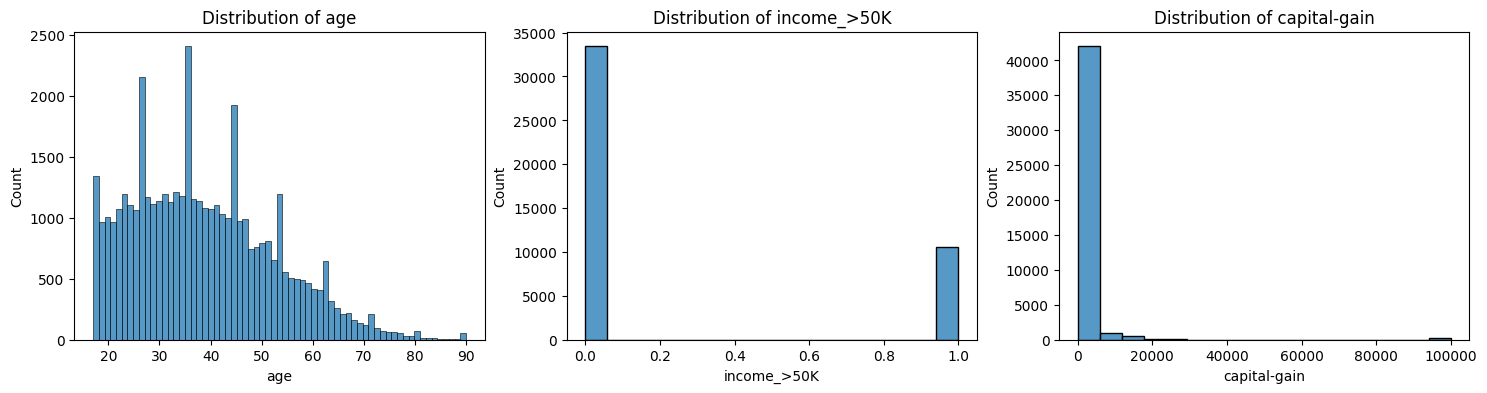

In [ ]:
# I used the normal distribution to show three numerical columns
def plotter(dataframe, a, b, c):
  plt.figure(figsize = (18,4))
  plt.subplot(1,3,1)
  sns.histplot(x=dataframe[a])
  plt.title(f'Distribution of {a}')

  plt.subplot(1,3,2)
  sns.histplot(x = dataframe[b])
  plt.title(f'Distribution of {b}')

  plt.subplot(1,3,3)
  sns.histplot(x = dataframe[c])
  plt.title(f'Distribution of {c}')

  plt.show()

plotter(data, 'age', 'income_>50K', 'capital-gain')


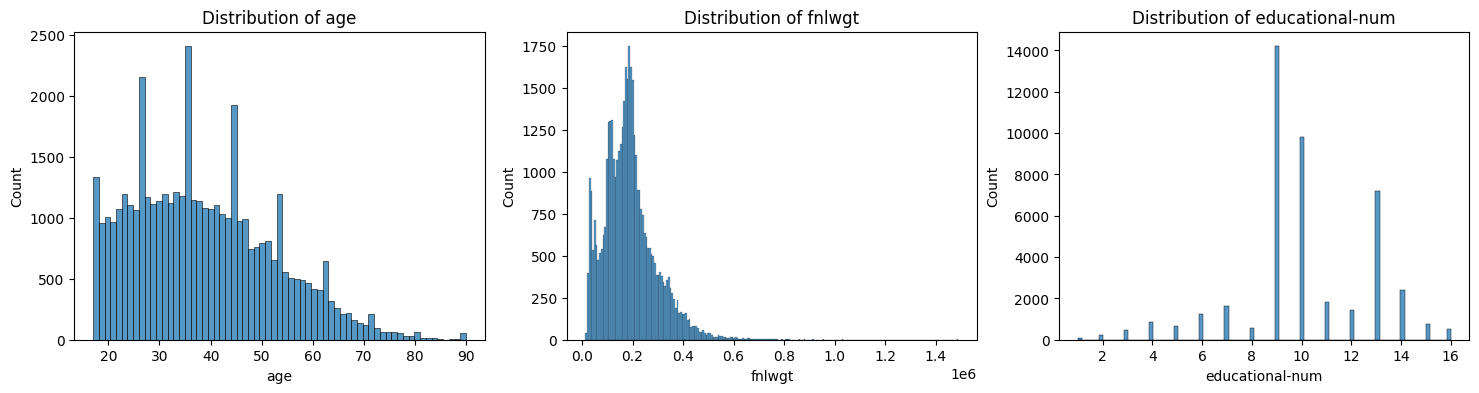

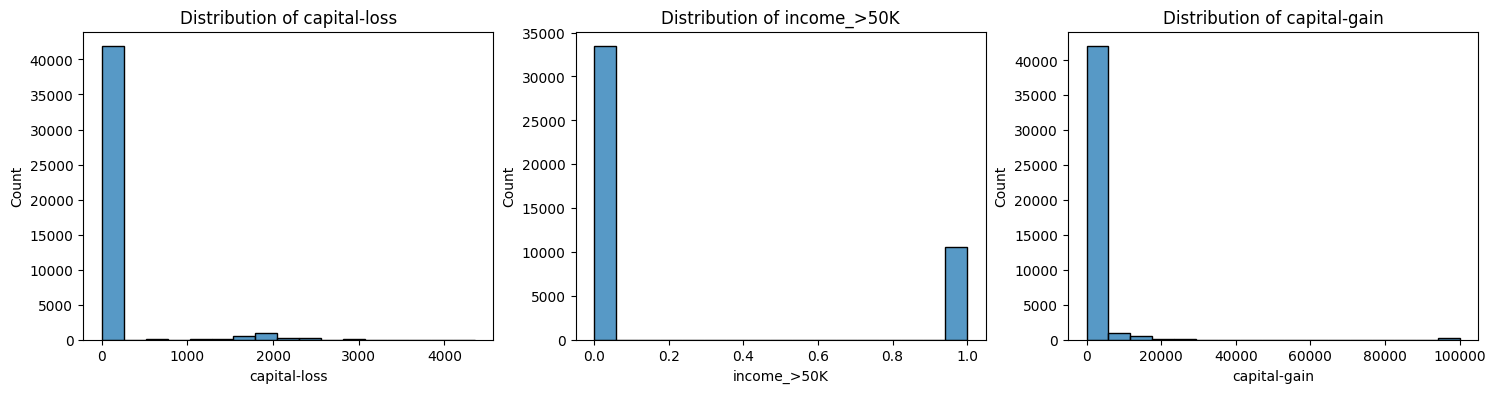

In [ ]:
# I showed the distribution of all numerical variable in the dataset
def plotter(dataframe, a, b, c):
  plt.figure(figsize = (18,4))
  plt.subplot(1,3,1)
  sns.histplot(x=dataframe[a])
  plt.title(f'Distribution of {a}')

  plt.subplot(1,3,2)
  sns.histplot(x = dataframe[b])
  plt.title(f'Distribution of {b}')

  plt.subplot(1,3,3)
  sns.histplot(x = dataframe[c])
  plt.title(f'Distribution of {c}')

  plt.show()

plotter(data, 'age', 'fnlwgt', 'educational-num')
plotter(data, 'capital-loss', 'income_>50K', 'capital-gain')


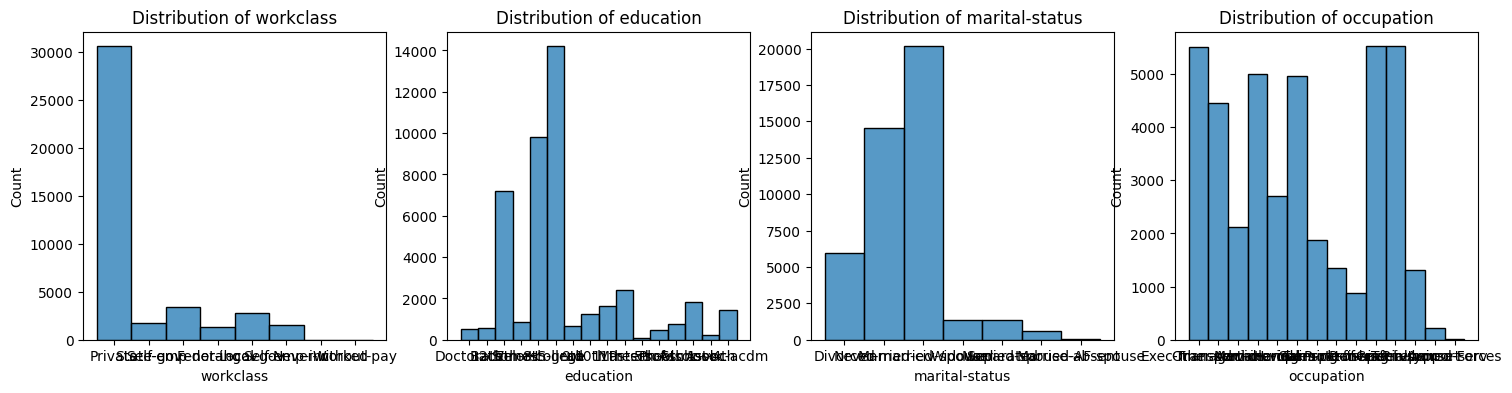

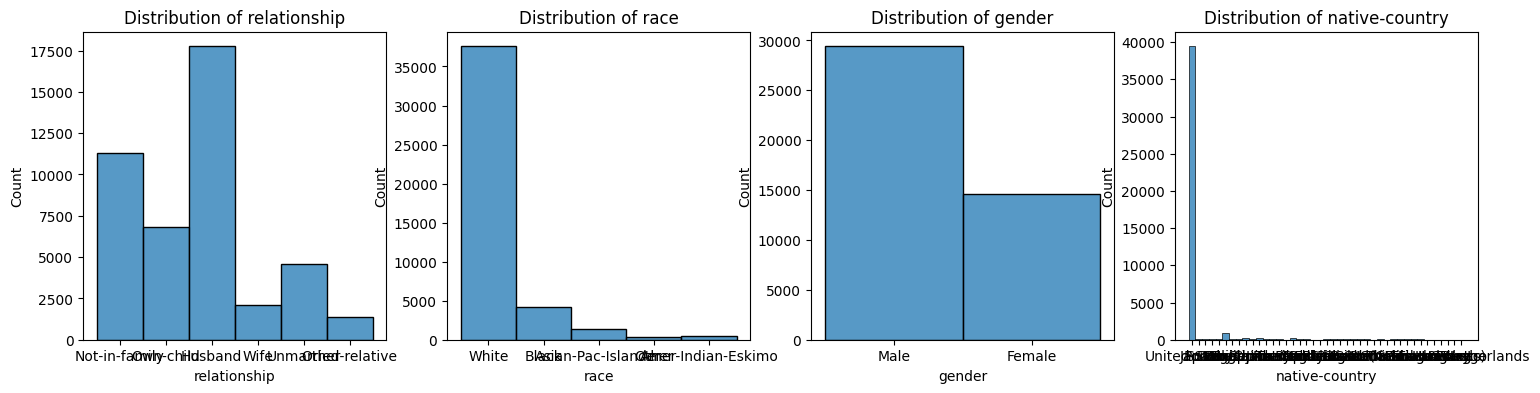

In [ ]:
# I showed the distribution of all the categorical variables in the dataset
def plotter(dataframe, a, b, c, d):
  plt.figure(figsize = (18,4))
  plt.subplot(1,4,1)
  sns.histplot(x=dataframe[a])
  plt.title(f'Distribution of {a}')

  plt.subplot(1,4,2)
  sns.histplot(x = dataframe[b])
  plt.title(f'Distribution of {b}')

  plt.subplot(1,4,3)
  sns.histplot(x = dataframe[c])
  plt.title(f'Distribution of {c}')

  plt.subplot(1,4,4)
  sns.histplot(x = dataframe[d])
  plt.title(f'Distribution of {d}')

  plt.show()

plotter(data, 'workclass', 'education', 'marital-status', 'occupation')
plotter(data, 'relationship', 'race', 'gender', 'native-country')